In [6]:
%cd /data/jupyter/root/ECNU/DataMining/L07-PowerStealing/

/data/jupyter/root/ECNU/DataMining/L07-PowerStealing


In [12]:
from __future__ import division
import os, sys

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

%matplotlib inline
import matplotlib.pyplot as plt
from numpy import nan as NA
np.random.seed(12345)
np.set_printoptions(precision=4)
plt.rc('figure', figsize=(10, 6))
import warnings
warnings.filterwarnings('ignore')

# 构建识别模型

## 数据划分

In [13]:
data_file = 'data/powerdata.xls'
data_ = pd.read_excel(data_file)
data_

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0
...,...,...,...,...
286,4,1,2,0
287,1,0,2,0
288,5,1,2,1
289,2,1,0,0


In [14]:
data

array([[4, 1, 1, 1],
       [4, 0, 4, 1],
       [2, 1, 1, 1],
       ...,
       [5, 1, 2, 1],
       [2, 1, 0, 0],
       [4, 1, 0, 0]])

In [15]:
from random import shuffle
data = data_.as_matrix()
shuffle(data)

In [16]:
p = 0.8
train = data[:int(len(data) * p), :]
test = data[int(len(data) * p):, :]

In [17]:
len(train)

232

In [18]:
len(test)

59

In [249]:
# test[:, 3] = 5
# test

# 决策树

In [250]:
# 构建CART决策树模型
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy')

In [251]:
# 训练模型
tree.fit(train[:, :3], train[:, 3]) # 训练喂数据 分别为特征和类标

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [368]:
# 保存模型
from sklearn.externals import joblib
tree_file = 'data/output/treemodel.pkl'
joblib.dump(tree, tree_file)

['data/output/treemodel.pkl']

In [253]:
# 直接预测
predict_result = tree.predict(test[:, :3])
predict_result

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [254]:
test

array([[4, 0, 2, 0],
       [2, 1, 0, 0],
       [4, 0, 2, 0],
       [2, 1, 1, 0],
       [2, 0, 1, 0],
       [4, 0, 2, 1],
       [4, 1, 0, 0],
       [0, 0, 0, 0],
       [2, 0, 3, 0],
       [4, 0, 1, 0],
       [4, 0, 2, 0],
       [4, 1, 0, 0],
       [2, 1, 0, 0],
       [1, 0, 3, 0],
       [1, 0, 2, 0],
       [0, 0, 0, 0],
       [1, 0, 2, 0],
       [3, 0, 0, 0],
       [4, 0, 2, 1],
       [3, 1, 0, 0],
       [6, 0, 0, 0],
       [1, 1, 2, 0],
       [2, 1, 4, 1],
       [5, 1, 2, 1],
       [0, 1, 2, 0],
       [0, 1, 2, 0],
       [2, 0, 2, 0],
       [4, 0, 2, 0],
       [0, 0, 2, 0],
       [7, 0, 0, 0],
       [4, 0, 2, 0],
       [7, 1, 4, 1],
       [2, 0, 1, 0],
       [2, 0, 2, 0],
       [3, 1, 2, 0],
       [0, 0, 2, 0],
       [2, 0, 2, 0],
       [7, 1, 1, 1],
       [5, 0, 2, 1],
       [1, 0, 1, 0],
       [1, 1, 0, 0],
       [1, 1, 2, 0],
       [1, 1, 0, 0],
       [0, 0, 0, 0],
       [4, 1, 0, 0],
       [4, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1,

In [255]:
# 准确率
accuracy = tree.score(test[:, :3], test[:,3])
accuracy

0.9152542372881356

In [256]:
# 结果对比
print(predict_result)
print(test[:, 3])

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [257]:
# 直接给出预测结果(就是可能性概率 > 0.5 认为类标为正)
predict_proba_result = tree.predict_proba(test[:, :3])
predict_proba_result

array([[0.8333, 0.1667],
       [0.6667, 0.3333],
       [0.8333, 0.1667],
       [0.375 , 0.625 ],
       [1.    , 0.    ],
       [0.8333, 0.1667],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [0.8333, 0.1667],
       [1.    , 0.    ],
       [0.6667, 0.3333],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [0.8333, 0.1667],
       [1.    , 0.    ],
       [0.4   , 0.6   ],
       [1.    , 0.    ],
       [0.    , 1.    ],
       [0.3333, 0.6667],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [0.8333, 0.1667],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [0.8333, 0.1667],
       [0.    , 1.    ],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [0.    , 1.    ],
       [0.    , 1.    ],
       [1.    , 0.    ],


## 结果可视化

In [258]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(
    test[:, 3], 
    tree.predict_proba(test[:,:3])[:, 1],
    pos_label=1
)
auc = metrics.auc(fpr, tpr)

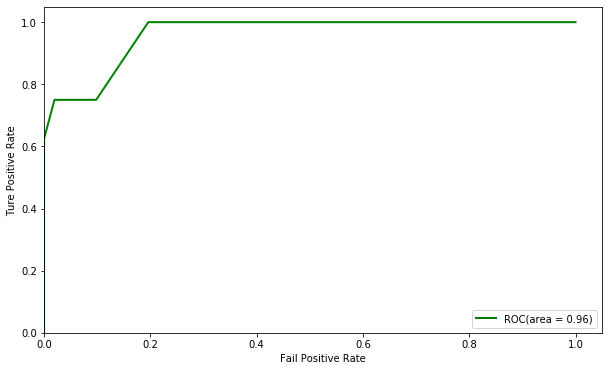

In [259]:
plt.plot(fpr, tpr, linewidth=2, label='ROC(area = %0.2f)' % auc, color='green')
plt.xlabel('Fail Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.legend(loc=4)
plt.show()

# 朴素贝叶斯

In [426]:
data_

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0
...,...,...,...,...
286,4,1,2,0
287,1,0,2,0
288,5,1,2,1
289,2,1,0,0


In [436]:
data = data_.as_matrix().copy()
shuffle(data)

p = 0.8
train = data[:int(len(data) * p), :]
test = data[int(len(data) * p):, :]
data

array([[4, 1, 1, 1],
       [4, 0, 4, 1],
       [2, 1, 1, 1],
       ...,
       [2, 1, 1, 1],
       [5, 1, 2, 1],
       [0, 0, 2, 0]])

In [437]:
from sklearn.naive_bayes import MultinomialNB

# 构建并训练数据
NB = MultinomialNB()
NB.fit(train[:, :3], train[:, 3])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [438]:
# 直接预测
predict_result = NB.predict(test[:, :3])
predict_result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [439]:
# 直接给出预测结果(就是可能性概率 > 0.5 认为类标为正)
predict_proba_result = NB.predict_proba(test[:, :3])
predict_proba_result

array([[0.6719, 0.3281],
       [0.6724, 0.3276],
       [0.6621, 0.3379],
       [0.6724, 0.3276],
       [0.7006, 0.2994],
       [0.666 , 0.334 ],
       [0.6724, 0.3276],
       [0.6885, 0.3115],
       [0.6582, 0.3418],
       [0.6923, 0.3077],
       [0.6368, 0.3632],
       [0.7159, 0.2841],
       [0.6621, 0.3379],
       [0.6704, 0.3296],
       [0.6747, 0.3253],
       [0.6681, 0.3319],
       [0.6704, 0.3296],
       [0.6408, 0.3592],
       [0.6927, 0.3073],
       [0.6453, 0.3547],
       [0.6923, 0.3077],
       [0.6767, 0.3233],
       [0.6681, 0.3319],
       [0.6327, 0.3673],
       [0.7006, 0.2994],
       [0.6865, 0.3135],
       [0.6408, 0.3592],
       [0.6493, 0.3507],
       [0.6317, 0.3683],
       [0.7001, 0.2999],
       [0.7083, 0.2917],
       [0.7119, 0.2881],
       [0.6621, 0.3379],
       [0.7119, 0.2881],
       [0.6724, 0.3276],
       [0.7001, 0.2999],
       [0.6538, 0.3462],
       [0.6704, 0.3296],
       [0.6927, 0.3073],
       [0.7018, 0.2982],


In [440]:
# 准确率
accuracy = NB.score(test[:, :3], test[:,3])
accuracy

0.864406779661017

## 结果可视化

In [441]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(
    test[:, 3], 
    NB.predict_proba(test[:,:3])[:, 1],
    pos_label=1
)
auc = metrics.auc(fpr, tpr)

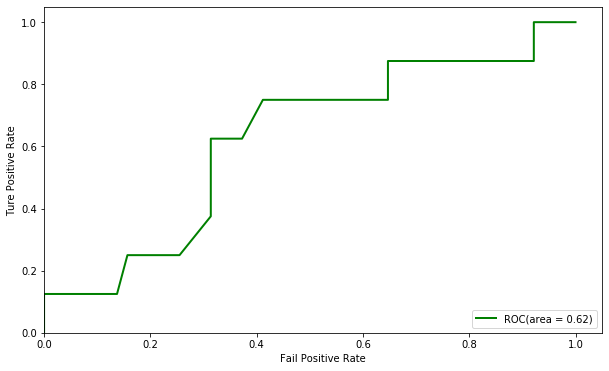

In [443]:
plt.plot(fpr, tpr, linewidth=2, label='ROC(area = %0.2f)' % auc, color='green')
plt.xlabel('Fail Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.legend(loc=4)
plt.show()

# 神经网络模型

In [19]:
data = data_.as_matrix().copy()
shuffle(data)

p = 0.8
train = data[:int(len(data) * p), :]
test = data[int(len(data) * p):, :]
data

array([[4, 1, 1, 1],
       [4, 0, 4, 1],
       [4, 0, 4, 1],
       ...,
       [3, 0, 1, 0],
       [0, 0, 3, 0],
       [9, 0, 0, 0]])

In [22]:
# 构建LM神经网络模型
from keras.models import Sequential
from keras.layers.core import Dense, Activation

net_file = 'data/output/net.model'

net = Sequential() #建立神经网络
net.add(Dense(input_dim=3, units=10)) #添加输入层(3节点)到隐藏层(10节点)的连接
net.add(Activation('relu'))# 隐藏层使用relu激活函数
net.add(Dense(input_dim=10, units=1)) #添加隐藏层(10节点)到输出层(1节点)的连接
net.add(Activation('sigmoid')) #输出层使用sigmoid激活函数
net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #编译模型， 使用adam方法求解

In [23]:
net.fit(
    train[:, :3],
    train[:, 3],
    epochs=100,
    batch_size=1
) #训练模型， 循环100次
net.save_weights(net_file) # 保存模型
predict_result = net.predict_classes(train[:, :3]).reshape(len(train)) #预测结果变形

Epoch 1/100
232/232 [==============================] - 1s 5ms/step - loss: 0.8945 - acc: 0.4612
Epoch 2/100
232/232 [==============================] - 0s 2ms/step - loss: 0.6817 - acc: 0.5560
Epoch 3/100
232/232 [==============================] - 0s 2ms/step - loss: 0.6328 - acc: 0.6940
Epoch 4/100
232/232 [==============================] - 0s 2ms/step - loss: 0.5985 - acc: 0.8233
Epoch 5/100
232/232 [==============================] - 0s 2ms/step - loss: 0.5668 - acc: 0.8793
Epoch 6/100
232/232 [==============================] - 0s 2ms/step - loss: 0.5397 - acc: 0.8879
Epoch 7/100
232/232 [==============================] - 0s 2ms/step - loss: 0.5145 - acc: 0.9310
Epoch 8/100
232/232 [==============================] - 0s 2ms/step - loss: 0.4901 - acc: 0.9181
Epoch 9/100
232/232 [==============================] - 0s 2ms/step - loss: 0.4707 - acc: 0.9009
Epoch 10/100
232/232 [==============================] - 0s 2ms/step - loss: 0.4524 - acc: 0.9397
Epoch 11/100
232/232 [=================

232/232 [==============================] - 0s 2ms/step - loss: 0.2000 - acc: 0.9526
Epoch 86/100
232/232 [==============================] - 0s 2ms/step - loss: 0.2013 - acc: 0.9526
Epoch 87/100
232/232 [==============================] - 0s 2ms/step - loss: 0.2038 - acc: 0.9526
Epoch 88/100
232/232 [==============================] - 0s 2ms/step - loss: 0.2032 - acc: 0.9526
Epoch 89/100
232/232 [==============================] - 0s 2ms/step - loss: 0.2008 - acc: 0.9526
Epoch 90/100
232/232 [==============================] - 0s 2ms/step - loss: 0.2006 - acc: 0.9526
Epoch 91/100
232/232 [==============================] - 0s 2ms/step - loss: 0.1975 - acc: 0.9526
Epoch 92/100
232/232 [==============================] - 0s 2ms/step - loss: 0.1995 - acc: 0.9483
Epoch 93/100
232/232 [==============================] - 0s 2ms/step - loss: 0.2002 - acc: 0.9526
Epoch 94/100
232/232 [==============================] - 0s 2ms/step - loss: 0.1985 - acc: 0.9526
Epoch 95/100
232/232 [=====================

In [24]:
predict_result = net.predict(test[:, :3]).reshape(len(test))
predict_result

array([6.8516e-02, 2.3374e-03, 1.0655e-02, 4.6263e-03, 9.2222e-01,
       8.1151e-02, 2.0765e-01, 9.9994e-01, 9.6120e-01, 2.1676e-02,
       3.7713e-03, 6.8516e-02, 1.5727e-01, 2.6327e-01, 3.7713e-03,
       9.9422e-01, 9.4039e-01, 3.8804e-03, 1.1446e-01, 5.0447e-03,
       8.7127e-04, 1.1739e-04, 3.7713e-03, 1.0000e+00, 2.0141e-01,
       9.4039e-01, 8.7864e-01, 2.0765e-01, 4.6263e-03, 8.9604e-01,
       1.1739e-04, 1.1446e-01, 2.7375e-01, 9.8390e-01, 9.4039e-01,
       1.0655e-02, 2.8121e-02, 4.6263e-03, 8.7127e-04, 9.4039e-01,
       9.9916e-01, 6.4356e-03, 9.2222e-01, 9.6120e-01, 3.8804e-03,
       2.0621e-01, 5.0447e-03, 5.9289e-01, 8.9604e-01, 1.1739e-04,
       2.0765e-01, 3.6296e-03, 9.8462e-01, 1.0655e-02, 1.9318e-01,
       3.8804e-03, 1.0655e-02, 5.2420e-04, 2.1676e-02], dtype=float32)

In [26]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(
    test[:, 3], 
    predict_result,
    pos_label=1
)
auc = metrics.auc(fpr, tpr)

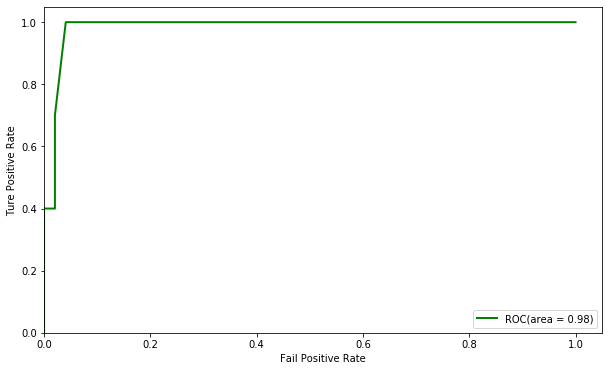

In [27]:
plt.plot(fpr, tpr, linewidth=2, label='ROC(area = %0.2f)' % auc, color='green')
plt.xlabel('Fail Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.legend(loc=4)
plt.show()